In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Three Observable Trends Based on the Data:
# 	1. Urban cities account for the majority of the total ride count (52.4%) and dominate the total driver count (77.4%). Although urban cities do not account for the majority of total fare, they account for the highest proportion (45.9%).
# 	2. Suburban and rural cities account for a relatively large percentage of total fare count (54.1% combined), despite having lower total driver and ride counts. This is possibly due to many rides from rural and suburban areas into urban city centers, which would require more distance, and thus higher fares than intra-urban pybers.
# 	3. Further expanding upon the claim made in my second observation, the graph demonstrates that the more rural (i.e. farther away from an urban area) a city is, the more expensive pybers are. As stated before, this is likely due to longer pyber distances, but is also likely a factor of scarcity.

In [13]:
# Set file paths
city_path = 'raw_data/city_data.csv'
ride_path = 'raw_data/ride_data.csv'

# Read CSVs into data frames
city_df = pd.read_csv(city_path)
ride_df = pd.read_csv(ride_path)

In [14]:
rides_group = ride_df.groupby("city", as_index=False)
rides_count = rides_group.count()
total_fare = rides_group["fare"].sum()
total_fare_df = pd.DataFrame(total_fare)
average_fare = rides_group["fare"].mean()
fare_df = pd.DataFrame(average_fare)
fare_df["Total Fare"] = total_fare["fare"]
fare_df["Ride Count"] = rides_count["date"]

In [15]:
plot_df = pd.merge(city_df, fare_df, how='outer')

In [16]:
urban_df = plot_df.loc[plot_df["type"]=="Urban", :]

suburban_df = plot_df.loc[plot_df["type"]=="Suburban", :]

rural_df = plot_df.loc[plot_df["type"]=="Rural", :]

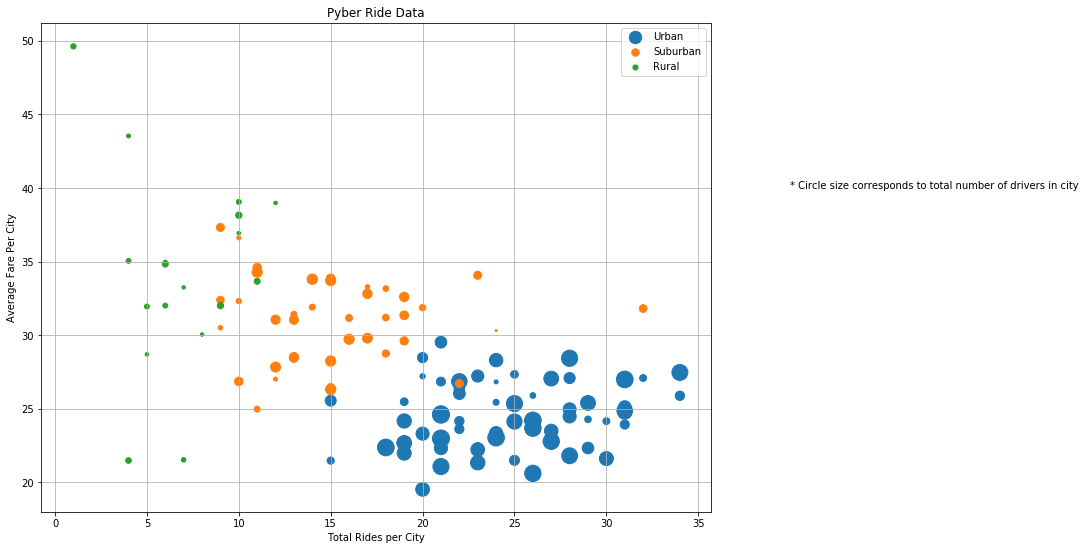

In [17]:

plt.scatter(urban_df["Ride Count"], urban_df["fare"], s=urban_df["driver_count"]*4, label="Urban")
plt.scatter(suburban_df["Ride Count"], suburban_df["fare"], s=suburban_df["driver_count"]*4, label="Suburban")
plt.scatter(rural_df["Ride Count"], rural_df["fare"], s=rural_df["driver_count"]*4, label="Rural")
plt.ylabel("Average Fare Per City")
plt.xlabel("Total Rides per City")
plt.title("Pyber Ride Data")
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.legend()
plt.autoscale()
plt.text(40, 40, "* Circle size corresponds to total number of drivers in city")
plt.grid()

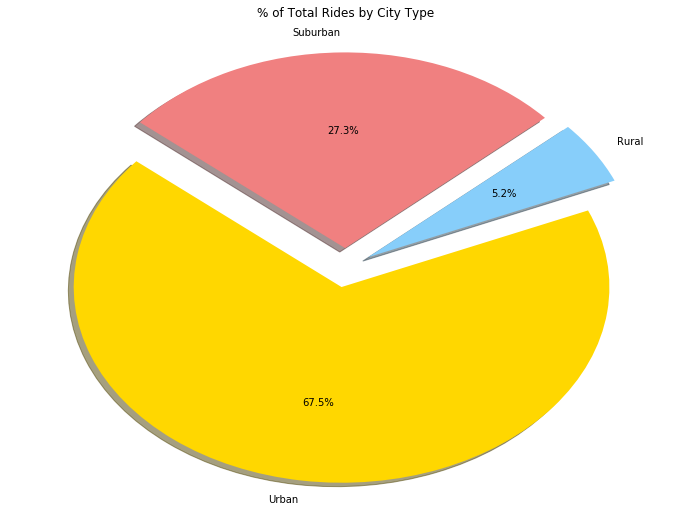

In [18]:
# Pie charts

# % of Total Rides by City Type
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_df["Ride Count"].sum(), rural_df["Ride Count"].sum(), suburban_df["Ride Count"].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

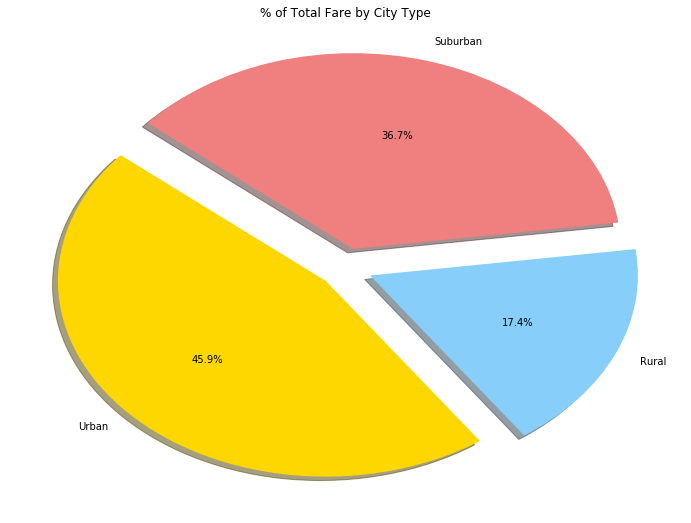

In [19]:
# Pie charts

# % of Total Fare by City Type
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_df["fare"].sum(), rural_df["fare"].sum(), suburban_df["fare"].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")
plt.show()

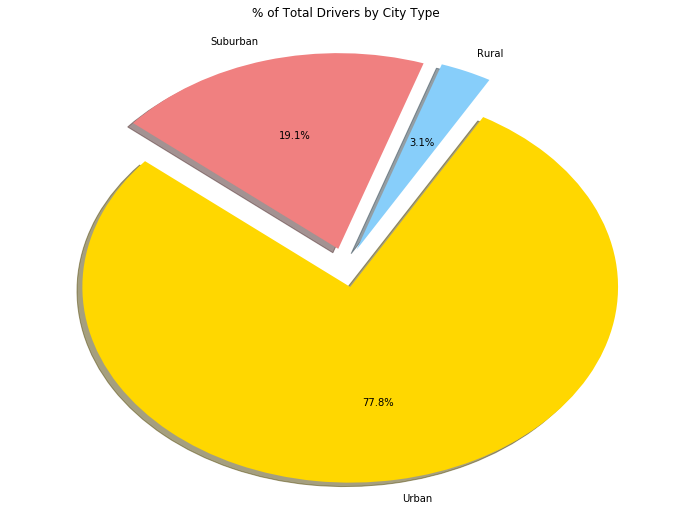

In [20]:
# Pie charts

# % of Total Drivers by City Type
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_df["driver_count"].sum(), rural_df["driver_count"].sum(), suburban_df["driver_count"].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0.1, 0.1, 0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()